# 판다스 데이터분석
## CrossTab, Pivot_Table
판다스에서 crosstab과 pivot_table은 데이터를 재구성하고 요약하는 데 유용한 함수입니다.

* crosstab : 이 함수는 두 칼럼의 교차 빈도, 비율, 덧셈 등을 구할 때 사용합니다. 주로 범주형 데이터의 분류를 위해 사용되며, 간단히 말해서 두 칼럼에 대한 교차표를 생성해줍니다.

In [1]:
# CrossTab: 원하는 행과 열을 설정해서 '빈도값'
# Pivot_talble: 원하는 행과 열을 설정해서 특정값의 '집계값'

import pandas as pd
import numpy as np

np.random.seed(42)

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['X', 'Y', 'Z'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,X,foo,0.496714,0.241962
1,one,Y,foo,-0.138264,-1.913280
2,two,Z,foo,0.647689,-1.724918
3,three,X,bar,1.523030,-0.562288
4,one,Y,bar,-0.234153,-1.012831
5,one,Z,bar,-0.234137,0.314247
6,two,X,foo,1.579213,-0.908024
7,three,Y,foo,0.767435,-1.412304
8,one,Z,foo,-0.469474,1.465649
9,one,X,bar,0.542560,-0.225776


In [2]:
pd.crosstab(index=[df['A'], df['B']], columns=df['C'], margins=True, normalize=True) # 행과 열이 모두 범주형 데이터

C             bar       foo       All
A     B                              
one   X  0.083333  0.083333  0.166667
      Y  0.083333  0.083333  0.166667
      Z  0.083333  0.083333  0.166667
three X  0.083333  0.000000  0.083333
      Y  0.000000  0.083333  0.083333
      Z  0.083333  0.000000  0.083333
two   X  0.000000  0.083333  0.083333
      Y  0.083333  0.000000  0.083333
      Z  0.000000  0.083333  0.083333
All      0.500000  0.500000  1.000000

* pivot_table : 이 함수는 복잡한 데이터 집계를 수행할 수 있습니다. 여러 개의 변수에 대한 요약 통계를 구할 때 유용하며, pivot_table의 장점은 'aggfunc' 파라미터를 통해 다양한 집계 함수를 적용할 수 있다는 것입니다. 'mean', 'sum', 'count' 등의 함수를 적용할 수 있습니다.

In [3]:
df

,A,B,C,D,E
0,one,X,foo,0.496714,0.241962
1,one,Y,foo,-0.138264,-1.913280
2,two,Z,foo,0.647689,-1.724918
3,three,X,bar,1.523030,-0.562288
4,one,Y,bar,-0.234153,-1.012831
5,one,Z,bar,-0.234137,0.314247
6,two,X,foo,1.579213,-0.908024
7,three,Y,foo,0.767435,-1.412304
8,one,Z,foo,-0.469474,1.465649
9,one,X,bar,0.542560,-0.225776


In [4]:
df.pivot_table(index='A', columns='C', values=['D', 'E'], aggfunc=['mean'])

mean                              
              D                   E          
C           bar       foo       bar       foo
A                                            
one    0.024757 -0.037008 -0.308120 -0.068556
three  0.528650  0.767435 -0.993518 -1.412304
two   -0.463418  1.113451  0.067528 -1.316471

In [5]:
df.pivot_table(index=['A','B'], columns='C', values={'D': 'max', 'E': 'min'})

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   X  0.542560  0.496714 -0.225776  0.241962
      Y -0.234153 -0.138264 -1.012831 -1.913280
      Z -0.234137 -0.469474  0.314247  1.465649
three X  1.523030       NaN -0.562288       NaN
      Y       NaN  0.767435       NaN -1.412304
      Z -0.465730       NaN -1.424748       NaN
two   X       NaN  1.579213       NaN -0.908024
      Y -0.463418       NaN  0.067528       NaN
      Z       NaN  0.647689       NaN -1.724918

### 연습문제
1. crosstab을 사용하여 'A'와 'B'의 교차 빈도를 구하세요.

In [6]:
pd.crosstab(df.A, df.B)

B,X,Y,Z
A,,,
one,2,2,2
three,1,1,1
two,1,1,1


2. 동일한 데이터프레임에서 pivot_table을 사용하여 'A'를 인덱스로, 'C'를 칼럼으로, 'D'의 평균을 값으로 가지는 피벗 테이블을 만드세요.

In [7]:
df.pivot_table(index='A', columns='C', aggfunc='mean')

C:\Users\haseong\AppData\Local\Temp\ipykernel_22428\1751298791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.pivot_table(index='A', columns='C', aggfunc='mean')


D                   E          
C           bar       foo       bar       foo
A                                            
one    0.024757 -0.037008 -0.308120 -0.068556
three  0.528650  0.767435 -0.993518 -1.412304
two   -0.463418  1.113451  0.067528 -1.316471

3. pivot_table을 사용하여 'A'와 'B'를 인덱스로, 'D'와 'E'의 평균을 값으로 가지는 피벗 테이블을 만드세요.

In [8]:
df.pivot_table(index=['A', 'B'], values=['D', 'E'], aggfunc='mean')

D         E
A     B                    
one   X  0.519637  0.008093
      Y -0.186209 -1.463056
      Z -0.351806  0.889948
three X  1.523030 -0.562288
      Y  0.767435 -1.412304
      Z -0.465730 -1.424748
two   X  1.579213 -0.908024
      Y -0.463418  0.067528
      Z  0.647689 -1.724918

4. 동일한 데이터프레임에서 crosstab을 사용하여 'A'와 'B'의 교차 빈도를 구하되, 'C'가 'foo'인 행만 포함하여 계산하세요.

In [9]:
pd.crosstab(index=df[df['C']=="foo"]['A'], columns=df['B'])

B,X,Y,Z
A,,,
one,1,1,1
three,0,1,0
two,1,0,1


5. pivot_table을 사용하여 'B'를 인덱스로, 'C'를 칼럼으로, 'D'와 'E'의 합계를 값으로 가지는 피벗 테이블을 만드세요.

In [10]:
df.pivot_table(index='B', columns='C', values=['D', 'E'], aggfunc="sum")

D                   E          
C       bar       foo       bar       foo
B                                        
X  2.065590  2.075927 -0.788064 -0.666062
Y -0.697571  0.629170 -0.945303 -3.325584
Z -0.699867  0.178214 -1.110501 -0.259269

6. crosstab을 사용하여 'A'와 'C'의 교차 빈도를 구하되, 각 셀에 백분율을 표시하세요.

In [11]:
pd.crosstab(index=df['A'], columns=df['C'], normalize=True)

C,bar,foo
A,,
one,0.250000,0.250000
three,0.166667,0.083333
two,0.083333,0.166667


7. pivot_table을 사용하여 'A'와 'B'를 인덱스로, 'C'를 칼럼으로, 'D'의 최대값과 'E'의 최소값을 값으로 가지는 피벗 테이블을 만드세요.

In [12]:
df.pivot_table(index=['A', 'B'], columns='C', values={'D':'max', 'E':'min'})

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   X  0.542560  0.496714 -0.225776  0.241962
      Y -0.234153 -0.138264 -1.012831 -1.913280
      Z -0.234137 -0.469474  0.314247  1.465649
three X  1.523030       NaN -0.562288       NaN
      Y       NaN  0.767435       NaN -1.412304
      Z -0.465730       NaN -1.424748       NaN
two   X       NaN  1.579213       NaN -0.908024
      Y -0.463418       NaN  0.067528       NaN
      Z       NaN  0.647689       NaN -1.724918

8. crosstab을 사용하여 'B'와 'C'의 교차 빈도를 구하되, 행과 열의 합계를 표시하세요.

In [13]:
pd.crosstab(index=df['B'], columns=df['C'], margins=True)

C,bar,foo,All
B,,,
X,2,2,4
Y,2,2,4
Z,2,2,4
All,6,6,12


9. pivot_table을 사용하여 'A'와 'B'를 멀티 인덱스로, 'C'를 칼럼으로, 'D'와 'E'의 중앙값으로 가지는 피벗 테이블을 만드세요.

In [14]:
df.pivot_table(index=['A', 'B'], columns='C', values=['D', 'E'], aggfunc="median")

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   X  0.542560  0.496714 -0.225776  0.241962
      Y -0.234153 -0.138264 -1.012831 -1.913280
      Z -0.234137 -0.469474  0.314247  1.465649
three X  1.523030       NaN -0.562288       NaN
      Y       NaN  0.767435       NaN -1.412304
      Z -0.465730       NaN -1.424748       NaN
two   X       NaN  1.579213       NaN -0.908024
      Y -0.463418       NaN  0.067528       NaN
      Z       NaN  0.647689       NaN -1.724918

10. crosstab을 사용하여 'A', 'B', 'C'의 교차 빈도를 구하세요.

In [15]:
pd.crosstab(index=[df['A'], df['B']], columns='C')

col_0    C
A     B   
one   X  2
      Y  2
      Z  2
three X  1
      Y  1
      Z  1
two   X  1
      Y  1
      Z  1

## 누락값 처리하기
판다스에서 누락값은 데이터에서 값이 존재하지 않는, 즉 "결측값"을 나타냅니다. 이는 대부분 NaN (Not a Number)으로 표시됩니다. 이러한 누락값은 데이터를 수집, 정리, 변환하는 과정에서 발생할 수 있으며, 이를 올바르게 처리하는 것은 데이터 분석의 중요한 단계입니다.

* 누락값 제거하기: dropna() 함수를 사용하여 누락값을 가진 행 또는 열을 제거할 수 있습니다. 행을 삭제할 때는 df.dropna(axis=0)을, 열을 삭제할 때는 df.dropna(axis=1)을 사용합니다. 하지만 이 방법은 주의가 필요합니다. 너무 많은 데이터를 삭제하면 데이터의 분포가 달라질 수 있기 때문입니다. 또는 subset 매개변수를 사용하여 특정 열에 NaN이 있는 행만 삭제할 수 있습니다.

In [16]:
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5, 6, 7, 8, 9, 10, 5],
    'B': [np.nan, 2, 3, 4, 5, np.nan, 7, 8, 9, 10, 4],
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, np.nan, 3]
})

df

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,NaN,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10 non-null     float64
 1   B       9 non-null      float64
 2   C       10 non-null     float64
dtypes: float64(3)
memory usage: 392.0 bytes


In [18]:
pd.isnull(np.nan)

True

In [19]:
df.isnull().sum()

A    1
B    2
C    1
dtype: int64

In [20]:
df.dropna(axis=0) # axis=0 누락값이 있는 행 삭제, axis=1 누락값이 있는 열 삭제

,A,B,C
1,2.0,2.0,2.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


In [21]:
df

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,NaN,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


* 누락값 채우기: fillna() 함수를 사용하여 누락값을 다른 값으로 채울 수 있습니다. 특정 값으로 채우는 것 뿐만 아니라, 이전 행 또는 다음 행의 값으로 채우는 방법(backward fill 또는 forward fill)도 있습니다. 예를 들어, df.fillna(0)은 누락값을 0으로 채우고, df.fillna(method='ffill')는 이전 행의 값으로 누락값을 채우며, df.fillna(method='bfill')는 다음 행의 값으로 누락값을 채웁니다. 또한 사전(dict) 형식의 입력도 받아서 다른 칼럼마다 다른 값을 채울 수 있습니다.

In [22]:
df.dropna(subset=['B', 'C'])

,A,B,C
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


In [23]:
df.fillna(df.mean())    # 각각의 열의 평균으로 채우기

,A,B,C
0,1.0,5.777778,1.0
1,2.0,2.000000,2.0
2,5.7,3.000000,3.0
3,4.0,4.000000,4.0
4,5.0,5.000000,5.0
5,6.0,5.777778,6.0
6,7.0,7.000000,7.0
7,8.0,8.000000,8.0
8,9.0,9.000000,9.0
9,10.0,10.000000,4.8


In [24]:
df.fillna(method="ffill") # front fill

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,2.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,5.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,9.0


In [25]:
df.fillna(method="bfill")   # back fill

,A,B,C
0,1.0,2.0,1.0
1,2.0,2.0,2.0
2,4.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,7.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,3.0


In [26]:
df.fillna({'A':0, 'B':10, 'C':100})

,A,B,C
0,1.0,10.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,10.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,100.0


In [27]:
df.fillna({'A':df['A'].mean(), 'B':df['B'].median(), 'C':df['C'].max()})

,A,B,C
0,1.0,5.0,1.0
1,2.0,2.0,2.0
2,5.7,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,5.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,9.0


In [28]:
df['A'] + df['B']

0      NaN
1      4.0
2      NaN
3      8.0
4     10.0
5      NaN
6     14.0
7     16.0
8     18.0
9     20.0
10     9.0
dtype: float64

* 누락값 대체하기: replace() 함수를 사용하여 누락값을 다른 값으로 대체할 수도 있습니다. 이는 특정 조건을 만족하는 값을 대체하는 데 특히 유용합니다. 또한 replace() 함수는 사전(dict) 형식의 입력도 받아서 다른 칼럼마다 다른 값을 채울 수 있습니다.

* 누락값 확인하기: isnull() 또는 notnull() 함수를 사용하여 데이터프레임에서 누락값이 어디에 있는지를 확인할 수 있습니다.

* 누락값을 가진 데이터의 연산: 판다스의 기본 동작은 누락값을 '전파'하는 것입니다. 즉, 누락값이 포함된 연산 결과는 항상 누락값이 됩니다.

* interpolate() 함수는 누락된 데이터 값을 보간(interpolation)을 통해 채워 넣는 역할을 합니다. 이 함수는 기본적으로 선형 보간 방법을 사용합니다. 즉, 누락된 값들을 해당 값의 이전 값과 다음 값 사이의 선형 방정식을 사용하여 계산합니다.

In [29]:
# 흐름에 맞게 누락값 채워주는 함수

a = [1, np.nan, np.nan, 10]
date = ["2023/12/01", "2023/12/02", "2023/12/08", "2023/12/10"]

date = pd.to_datetime(date)
print(type(date[0]))

s = pd.Series(a, index=date)
s.interpolate(method="time")

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


2023-12-01     1.0
2023-12-02     2.0
2023-12-08     8.0
2023-12-10    10.0
dtype: float64

In [30]:
# 머신러닝으로 채우는 방법

from sklearn.impute import KNNImputer

model = KNNImputer(n_neighbors=2)   # 가장 가까운 데이터를 2개만 찾는다.
df2 = model.fit_transform(df)

pd.DataFrame(df2, columns=['A', 'B', 'C'])

,A,B,C
0,1.0,2.5,1.0
1,2.0,2.0,2.0
2,3.5,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,6.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,8.5


In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # 선형 회귀 누락값 (MICE)

model = IterativeImputer()
df2 = model.fit_transform(df)

pd.DataFrame(df2, columns=['A', 'B', 'C'])

,A,B,C
0,1.000000,1.000279,1.00000
1,2.000000,2.000000,2.00000
2,2.998888,3.000000,3.00000
3,4.000000,4.000000,4.00000
4,5.000000,5.000000,5.00000
5,6.000000,6.000027,6.00000
6,7.000000,7.000000,7.00000
7,8.000000,8.000000,8.00000
8,9.000000,9.000000,9.00000
9,10.000000,10.000000,10.00068


In [32]:
ebola = pd.read_csv("data/country_timeseries.csv")
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [34]:
ebola = pd.read_csv("data/country_timeseries.csv")

ebola["Date"] = pd.to_datetime(ebola["Date"])
ebola = ebola.set_index("Date")
ebola = ebola.sort_index()
ebola

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-22,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


In [35]:
ebola = ebola.interpolate(method="time")
ebola = ebola.fillna(method="ffill")
ebola = ebola.fillna(method="bfill")
ebola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2014-03-22 to 2015-01-05
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  122 non-null    int64  
 1   Cases_Guinea         122 non-null    float64
 2   Cases_Liberia        122 non-null    float64
 3   Cases_SierraLeone    122 non-null    float64
 4   Cases_Nigeria        122 non-null    float64
 5   Cases_Senegal        122 non-null    float64
 6   Cases_UnitedStates   122 non-null    float64
 7   Cases_Spain          122 non-null    float64
 8   Cases_Mali           122 non-null    float64
 9   Deaths_Guinea        122 non-null    float64
 10  Deaths_Liberia       122 non-null    float64
 11  Deaths_SierraLeone   122 non-null    float64
 12  Deaths_Nigeria       122 non-null    float64
 13  Deaths_Senegal       122 non-null    float64
 14  Deaths_UnitedStates  122 non-null    float64
 15  Deaths_Spain         

### 연습문제
1. 위의 DataFrame에서 누락값이 있는 행을 모두 제거하세요.

In [36]:
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5, 6, 7, 8, 9, 10, 5],
    'B': [np.nan, 2, 3, 4, 5, np.nan, 7, 8, 9, 10, 4],
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, np.nan, 3]
})

df

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,NaN,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


In [37]:
a = df.isnull().any(axis=1)
df[a]

,A,B,C
0,1.0,NaN,1.0
2,NaN,3.0,3.0
5,6.0,NaN,6.0
9,10.0,10.0,NaN


In [38]:
df.dropna()

,A,B,C
1,2.0,2.0,2.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


2. DataFrame에서 누락값을 0으로 채우세요.

In [39]:
df.fillna(0)

,A,B,C
0,1.0,0.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,0.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,0.0


3. DataFrame에서 누락값을 해당 열의 평균값으로 채우세요.

In [40]:
df.fillna(df.mean())

,A,B,C
0,1.0,5.777778,1.0
1,2.0,2.000000,2.0
2,5.7,3.000000,3.0
3,4.0,4.000000,4.0
4,5.0,5.000000,5.0
5,6.0,5.777778,6.0
6,7.0,7.000000,7.0
7,8.0,8.000000,8.0
8,9.0,9.000000,9.0
9,10.0,10.000000,4.8


4. DataFrame에서 누락값을 해당 열의 이전 행 값으로 채우세요.

In [41]:
df.fillna(method="bfill")

,A,B,C
0,1.0,2.0,1.0
1,2.0,2.0,2.0
2,4.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,7.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,3.0


5. DataFrame에서 누락값을 해당 열의 다음 행 값으로 채우세요.

In [42]:
df.fillna(method="ffill")

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,2.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,5.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,9.0


6. DataFrame에서 'A' 열의 누락값을 0, 'B' 열의 누락값을 1로 채우세요.

In [43]:
df.fillna({'A':0, 'B':1})

,A,B,C
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,1.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


7. DataFrame에서 누락값이 있는 행을 제거하되, 'B' 열에 대해서만 고려하세요.

In [44]:
df.dropna(subset='B')

,A,B,C
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN
10,5.0,4.0,3.0


8. DataFrame에서 'A' 열의 누락값을 해당 열의 중앙값으로 채우세요.

In [45]:
df.fillna({'A': df['A'].median()})

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,5.5,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,NaN,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


9. DataFrame에서 'B' 열의 누락값을 해당 열의 최빈값(mode)으로 채우세요.

In [46]:
df.fillna({'B': df['B'].mode()[0]})

,A,B,C
0,1.0,4.0,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,4.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


10. DataFrame에서 누락값이 있는 열을 모두 제거하세요.

In [47]:
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8
9


## to_datetime
판다스의 to_datetime() 함수는 문자열, 정수, 또는 실수와 같은 데이터 타입을 datetime64 형태로 변환해줍니다. 이는 날짜와 시간 정보를 가진 데이터를 다루는데 매우 유용합니다. 또한 to_datetime()은 유효하지 않은 날짜 형식의 에러 처리를 위해 errors 매개변수를 제공합니다. 기본값은 'raise'로, 에러가 발생하면 예외를 발생시킵니다. 'coerce'를 지정하면 에러가 발생하는 값을 NaT(Not a Time)으로 강제 변환하고, 'ignore'를 지정하면 에러를 무시하고 입력값을 그대로 반환합니다.

In [48]:
box = ["11.10.2023", "11.41.2023", "11.23.2023"]

pd.to_datetime(box, format="%m.%d.%Y", errors="coerce")  # 년도: 2자리(23)->%y(소문자), 4자리(2023)->%Y(대문자),    errors="coerce": error난 data는 누락값으로(NaT)

DatetimeIndex(['2023-11-10', 'NaT', '2023-11-23'], dtype='datetime64[ns]', freq=None)

to_datetime() 함수에서 format 매개변수는 날짜와 시간 정보가 포함된 문자열을 datetime 객체로 변환하는 데 도움을 줍니다. 이 매개변수는 문자열 내의 날짜와 시간 정보의 형식을 지정합니다.

* %Y : 네 자리 연도 (예: 2020)  
* %y : 두 자리 연도 (예: 20)  
* %m : 월 (예: 04)  
* %d : 일 (예: 28)  
* %H : 시간 (24시간 형식) (예: 13)  
* %I : 시간 (12시간 형식) (예: 01)  
* %M : 분 (예: 39)  
* %S : 초 (예: 07)  

예를 들어, 다음과 같이 날짜 정보가 '일-월-연도' 형식으로 저장된 문자열을 datetime 객체로 변환하려면 format 매개변수를 '%d-%m-%Y'로 설정합니다.

In [49]:
df = pd.read_csv("data/person_info.csv", encoding="euc-kr") # utf-8, cp949, euc-kr
df

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


In [50]:
df["출생일"] = pd.to_datetime(df['출생일'])
df["사망일"] = pd.to_datetime(df['사망일'])
df.info()

df["생존일"] = df["사망일"] - df["출생일"]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      8 non-null      object        
 1   출생일     8 non-null      datetime64[ns]
 2   사망일     8 non-null      datetime64[ns]
 3   나이      8 non-null      int64         
 4   직업      8 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 448.0+ bytes


,이름,출생일,사망일,나이,직업,생존일
0,홍길동,1920-07-25,1958-04-16,37,회사원,13779 days
1,이순신,1876-06-13,1937-10-16,61,군인,22404 days
2,이홍길,1820-05-12,1910-08-13,90,의사,32964 days
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days
6,기충현,1912-06-23,1954-06-07,41,회사원,15324 days
7,심기한,1777-04-30,1855-02-23,77,백수,28422 days


In [51]:
df["출생일"].dt.weekday

0    6
1    1
2    4
3    3
4    0
5    0
6    6
7    2
Name: 출생일, dtype: int64

.dt 접근자는 datetime 형식의 Series에서 날짜와 시간 정보에 쉽게 접근할 수 있도록 도와줍니다. 이는 Series.dt 형태로 사용하며, 여기서 Series는 datetime 형식의 판다스 Series입니다.

* s.dt.date: 날짜 정보만 추출
* s.dt.time: 시간 정보만 추출
* s.dt.year: 연도만 추출
* s.dt.month: 월만 추출
* s.dt.day: 일만 추출
* s.dt.hour: 시간만 추출
* s.dt.minute: 분만 추출
* s.dt.second: 초만 추출
* s.dt.dayofweek: 요일 정보 추출 (0: 월요일, 6: 일요일)
* s.dt.weekday: 요일 정보 추출 (0: 월요일, 6: 일요일)
* s.dt.weekofyear: 연도 내 주차 정보 추출
* s.dt.quarter: 분기 정보 추출

### 연습문제
1. 다음 문자열을 datetime 객체로 변환하세요: '2023-07-01'

In [52]:
pd.to_datetime("2023-07-01", format="%Y-%m-%d")

Timestamp('2023-07-01 00:00:00')

2. 다음 리스트의 모든 문자열을 datetime 객체로 변환하세요: ['2023-07-01', '2023-08-01', '2023-09-01']

In [53]:
pd.to_datetime(['2023-07-01', '2023-08-01', '2023-09-01'])

DatetimeIndex(['2023-07-01', '2023-08-01', '2023-09-01'], dtype='datetime64[ns]', freq=None)

3. 다음 문자열을 datetime 객체로 변환하세요. 만약 변환 과정에서 에러가 발생하면 NaT을 반환하도록 하세요: '2023-13-01'

In [54]:
pd.to_datetime('2023-13-01', errors="coerce")

NaT

In [55]:
help()


Welcome to Python 3.10's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the internet at https://docs.python.org/3.10/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".


You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


4. 다음 Series의 모든 문자열을 datetime 객체로 변환하세요. 단, 문자열의 형식은 '월-일-년'입니다.

In [56]:
s = pd.Series(['07-01-2023', '08-01-2023', '09-01-2023'])
pd.to_datetime(s, format="%m-%d-%Y")

0   2023-07-01
1   2023-08-01
2   2023-09-01
dtype: datetime64[ns]

5. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하세요.

In [57]:
df = pd.DataFrame({
    'date': ['2023-07-01', '2023-08-01', '2023-09-01'],
    'value': [1, 2, 3]
})

df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


6. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하고, 이를 인덱스로 설정하세요.

In [58]:
df = pd.DataFrame({
    'date': ['2023-07-01', '2023-08-01', '2023-09-01'],
    'value': [1, 2, 3]
})

df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df

,value
date,
2023-07-01,1
2023-08-01,2
2023-09-01,3


7. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하고, 이를 인덱스로 설정하세요. 단, 문자열의 형식은 '년-월-일 시:분:초'입니다.

In [59]:
df = pd.DataFrame({
    'date': ['2023-07-01 12:00:00', '2023-08-01 12:00:00', '2023-09-01 12:00:00'],
    'value': [1, 2, 3]
})

df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S")
df = df.set_index("date")
df

,value
date,
2023-07-01 12:00:00,1
2023-08-01 12:00:00,2
2023-09-01 12:00:00,3


8. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하세요. 만약 변환 과정에서 에러가 발생하면 NaT를 반환하도록 하세요.

In [60]:
df = pd.DataFrame({
    'date': ['2023-07-01', '2023-08-32', '2023-09-01'],
    'value': [1, 2, 3]
})

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df

,date,value
0,2023-07-01,1
1,NaT,2
2,2023-09-01,3


9. 다음 Series의 모든 문자열을 datetime 객체로 변환하세요. 단, 문자열의 형식은 '년월일'입니다.

In [61]:
s = pd.Series(['20230701', '20230801', '20230901'])

s = pd.to_datetime(s, format="%Y%m%d")
s

0   2023-07-01
1   2023-08-01
2   2023-09-01
dtype: datetime64[ns]

10. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하세요. 단, 문자열의 형식은 '월-일-년'이며, 형식에 맞지 않는 문자열은 NaT를 반환하도록 하세요.

In [62]:
df = pd.DataFrame({
    'date': ['07-01-2023', '08-32-2023', '09-01-2023'],
    'value': [1, 2, 3]
})

df["date"] = pd.to_datetime(df["date"], format="%m-%d-%Y", errors="coerce")
df

,date,value
0,2023-07-01,1
1,NaT,2
2,2023-09-01,3


## 데이터 시각화
파이썬에서는 다양한 라이브러리를 통해 데이터를 시각화할 수 있습니다. 대표적으로 Matplotlib, Seaborn, Plotly, Bokeh 등이 있습니다.

### 데이터 시각화가 중요한 이유
데이터를 수치 만을 믿어선 안됩니다. 기술통계(평균, 분산, 상관계수, 회귀선 등)는 거의 동일하지만, 시각적으로는 매우 다를 수가 있기 때문입니다.

In [63]:
# 약 5-6만개
# matplotlib: 가장 기반이 되는 시각화 라이브러리 + 커스터마이징(어렵다. )
# seaborn: 원래는 데이터분석연습용 lib + 자동으로 예쁜 그림(쉽다, 커스터마이징 제한)
# Plotly: 동적 그래프

import matplotlib.pyplot as plt
import seaborn as sns

# groupby // dataset별로 x와 y의 평균과 표준편차
anscombe = sns.load_dataset("anscombe")
print(anscombe.groupby("dataset").agg({
    'x': ["mean", "std"],
    'y': ["mean", "std"] }))

           x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579


In [64]:
from scipy import stats

for i in ['I', 'II', 'III', 'IV']:
    sample = anscombe[anscombe["dataset"] == i]

    mean_x = sample['x'].mean()
    mean_y = sample['y'].mean()

    std_x = sample['x'].std()
    std_y = sample['y'].std()

    corr = sample['x'].corr(sample['y'])
    a, b, r, p, e = stats.linregress(sample['x'], sample['y'])

    print(f'Dataset: {i}')
    print(f'Mean of x: {mean_x}, Mean of yL {mean_y}')
    print(f'Std of x: {std_x}, Std of yL {std_y}')
    print(f'Correlation: {corr}')
    print(f'Regression Line: y = {a}x + {b}')
    
    print()

Dataset: I
Mean of x: 9.0, Mean of yL 7.500909090909093
Std of x: 3.3166247903554, Std of yL 2.031568135925815
Correlation: 0.81642051634484
Regression Line: y = 0.5000909090909091x + 3.0000909090909103

Dataset: II
Mean of x: 9.0, Mean of yL 7.50090909090909
Std of x: 3.3166247903554, Std of yL 2.0316567355016177
Correlation: 0.8162365060002428
Regression Line: y = 0.5000000000000001x + 3.000909090909089

Dataset: III
Mean of x: 9.0, Mean of yL 7.5
Std of x: 3.3166247903554, Std of yL 2.030423601123667
Correlation: 0.8162867394895984
Regression Line: y = 0.4997272727272729x + 3.002454545454544

Dataset: IV
Mean of x: 9.0, Mean of yL 7.500909090909091
Std of x: 3.3166247903554, Std of yL 2.0305785113876023
Correlation: 0.8165214368885028
Regression Line: y = 0.4999090909090909x + 3.0017272727272726



In [65]:
from scipy import stats

for i in ['I', "II", 'III',"IV"]:
  sample = anscombe[anscombe['dataset'] == i]

  mean_x = sample['x'].mean()
  mean_y = sample['y'].mean()

  std_x = sample['x'].std()
  std_y = sample['y'].std()

  corr = sample['x'].corr(sample['y'])
  a,b,r,p,e = stats.linregress(sample['x'], sample['y'])

  print(f"Dataset : {i}")
  print(f"Mean of x : {mean_x}, Mean of y : {mean_y}")
  print(f"Std of x : {std_x}, Std of y : {std_y}")
  print(f'Correlation: {corr}')
  print(f"Regression Line : y = {a}x + {b}")

  print()

Dataset : I
Mean of x : 9.0, Mean of y : 7.500909090909093
Std of x : 3.3166247903554, Std of y : 2.031568135925815
Correlation: 0.81642051634484
Regression Line : y = 0.5000909090909091x + 3.0000909090909103

Dataset : II
Mean of x : 9.0, Mean of y : 7.50090909090909
Std of x : 3.3166247903554, Std of y : 2.0316567355016177
Correlation: 0.8162365060002428
Regression Line : y = 0.5000000000000001x + 3.000909090909089

Dataset : III
Mean of x : 9.0, Mean of y : 7.5
Std of x : 3.3166247903554, Std of y : 2.030423601123667
Correlation: 0.8162867394895984
Regression Line : y = 0.4997272727272729x + 3.002454545454544

Dataset : IV
Mean of x : 9.0, Mean of y : 7.500909090909091
Std of x : 3.3166247903554, Std of y : 2.0305785113876023
Correlation: 0.8165214368885028
Regression Line : y = 0.4999090909090909x + 3.0017272727272726



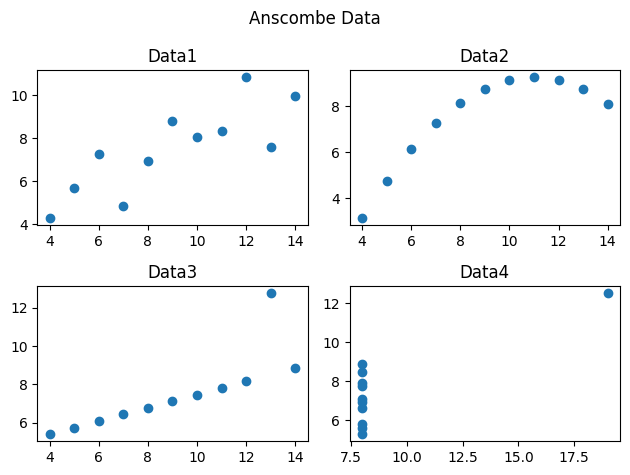

In [66]:
data1 = anscombe[anscombe["dataset"] == 'I']
data2 = anscombe[anscombe["dataset"] == 'II']
data3 = anscombe[anscombe["dataset"] == 'III']
data4 = anscombe[anscombe["dataset"] == 'IV']

fig = plt.figure()  # 흰색 도화지

ax1 = fig.add_subplot(2, 2, 1)  # 2행 2열 1번째
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(data1.x, data1.y)
ax2.scatter(data2.x, data2.y)
ax3.scatter(data3.x, data3.y)
ax4.scatter(data4.x, data4.y)

ax1.set_title("Data1")
ax2.set_title("Data2")
ax3.set_title("Data3")
ax4.set_title("Data4")

fig.suptitle("Anscombe Data")
fig.tight_layout()

plt.savefig("result.png")

### Matplotlib
Matplotlib: Matplotlib은 파이썬에서 가장 널리 사용되는 데이터 시각화 라이브러리 중 하나입니다. 기본적인 선, 막대, 파이 차트뿐만 아니라 히스토그램, 오차 막대, 스캐터 플롯 등 고급 차트를 그릴 수 있습니다.

* 선 그래프 (Line plot): 데이터가 시간, 순서 등에 따라 어떻게 변하는지 보여주는 데 사용됩니다.

또한 색상, 마커, 선 스타일 변경: plt.plot() 함수에서 색상, 마커(예를들어 'o'는 원형 마커, 's'는 사각형 마커, '*'는 별형 마커 등을 표현합니다.), 선 스타일(예를 들어, '-'는 실선, '--'는 파선, '-.'는 일점쇄선, ':'는 점선을 표현합니다.)을 변경할 수 있으며, 축 범위 설정 plt.xlim(), plt.ylim() 함수를 사용하여 x축과 y축의 범위를 설정할 수 있습니다.

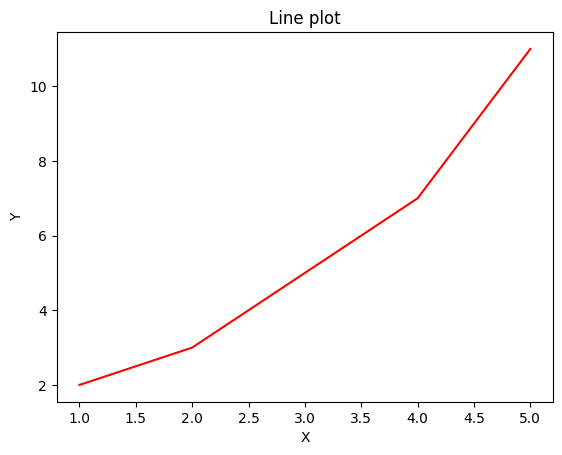

In [81]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot()
plt.plot(x, y, "-r")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Line plot")
plt.show()

* 막대 그래프 (Bar plot): 범주형 데이터를 대표하는 데 주로 사용됩니다.

In [84]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

<BarContainer object of 3 artists>

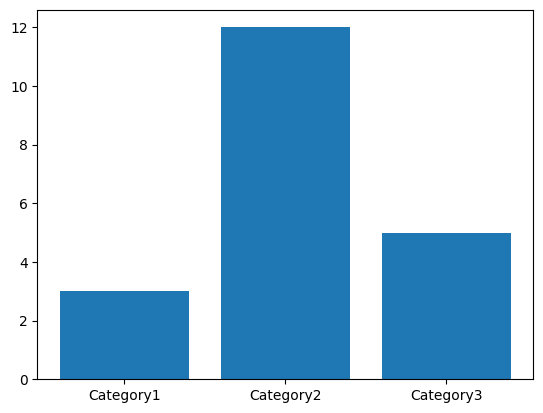

In [68]:
x = ['Category1', 'Category2', 'Category3']
y = [3, 12, 5]

plt.bar(x, y)

* 히스토그램 (Histogram): 데이터의 분포를 보여주는 데 사용됩니다.

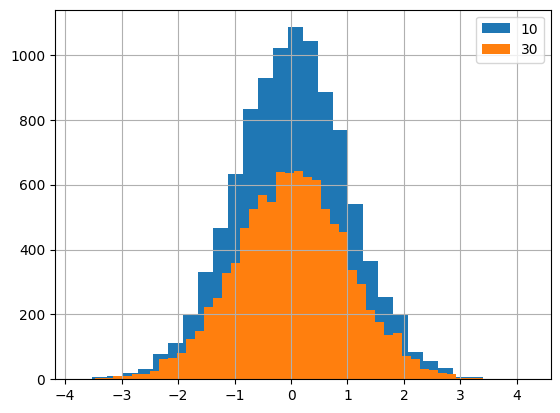

In [99]:
data = np.random.randn(10000)

plt.hist(data, bins=30)
plt.hist(data, bins=50)
plt.legend(["10", "30"])
plt.grid()
plt.show()

* 산점도 (Scatter plot): 두 변수 간의 관계를 보여주는 데 사용됩니다.

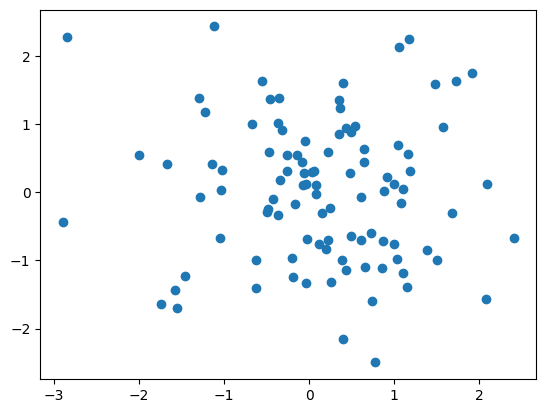

In [70]:
x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y)

* 파이 차트 (Pie chart): 전체에 대한 각 부분의 비율을 보여주는 데 사용됩니다.

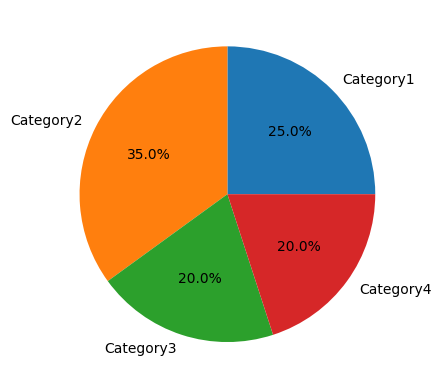

In [106]:
sizes = [25, 35, 20, 20]
labels = ['Category1', 'Category2', 'Category3', 'Category4']

plt.pie(sizes, labels=labels, autopct="%.1f%%")
plt.show()

### Seaborn
Seaborn은 Matplotlib을 기반으로 하며, 통계 데이터 시각화에 중점을 둡니다. 더 복잡한 시각화를 간편하게 만들 수 있으며, Matplotlib보다 향상된 기능과 시각적 요소를 제공합니다.

data: 입력 데이터입니다. 대부분의 경우 Pandas의 DataFrame을 사용합니다.  
x, y: 데이터의 변수 이름입니다. 이들은 data 인수에 전달된 DataFrame에서 선택됩니다.  
hue: 색상을 기준으로 분할할 변수의 이름입니다.  
size: 크기를 기준으로 분할할 변수의 이름입니다.  
style: 스타일을 기준으로 분할할 변수의 이름입니다.  
palette: 한 그래프 내에서 사용할 색상 팔레트입니다. 문자열, 리스트, 딕셔너리 등이 될 수 있습니다.  
color: 모든 요소에 대해 사용할 색상입니다.  

* 산점도 (Scatter plot): 두 변수 사이의 관계를 보여줍니다.

In [119]:
tips = sns.load_dataset("tips") # 2개 특성(이변량 그래프), 연속변수
tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


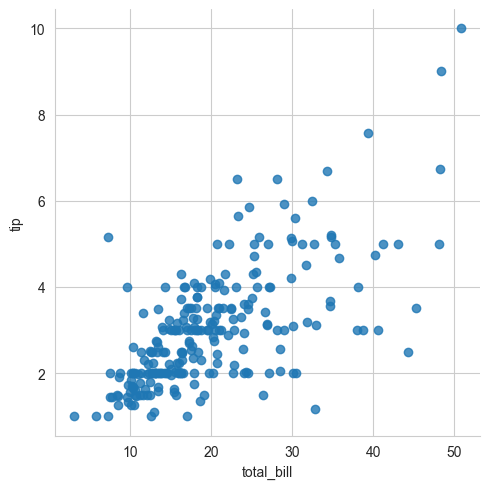

In [125]:
sns.set_style("whitegrid") # white, whitegrid, dark, darkgrid

sns.lmplot(data=tips, x="total_bill", y="tip", fit_reg=False)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

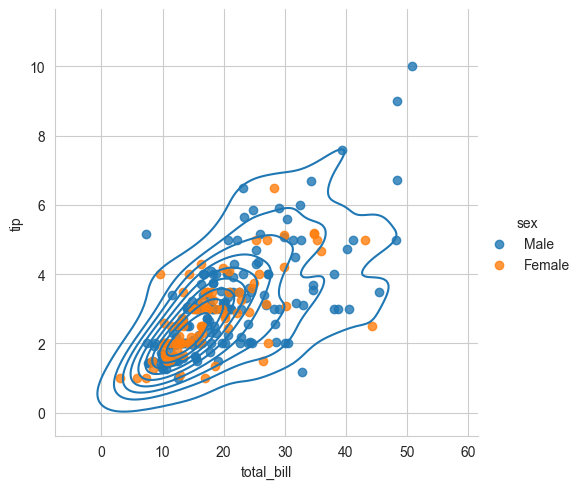

In [151]:
sns.set_style("whitegrid") # white, whitegrid, dark, darkgrid

sns.lmplot(data=tips, x="total_bill", y="tip", fit_reg=False, hue="sex")
sns.kdeplot(data=tips, x="total_bill", y="tip")

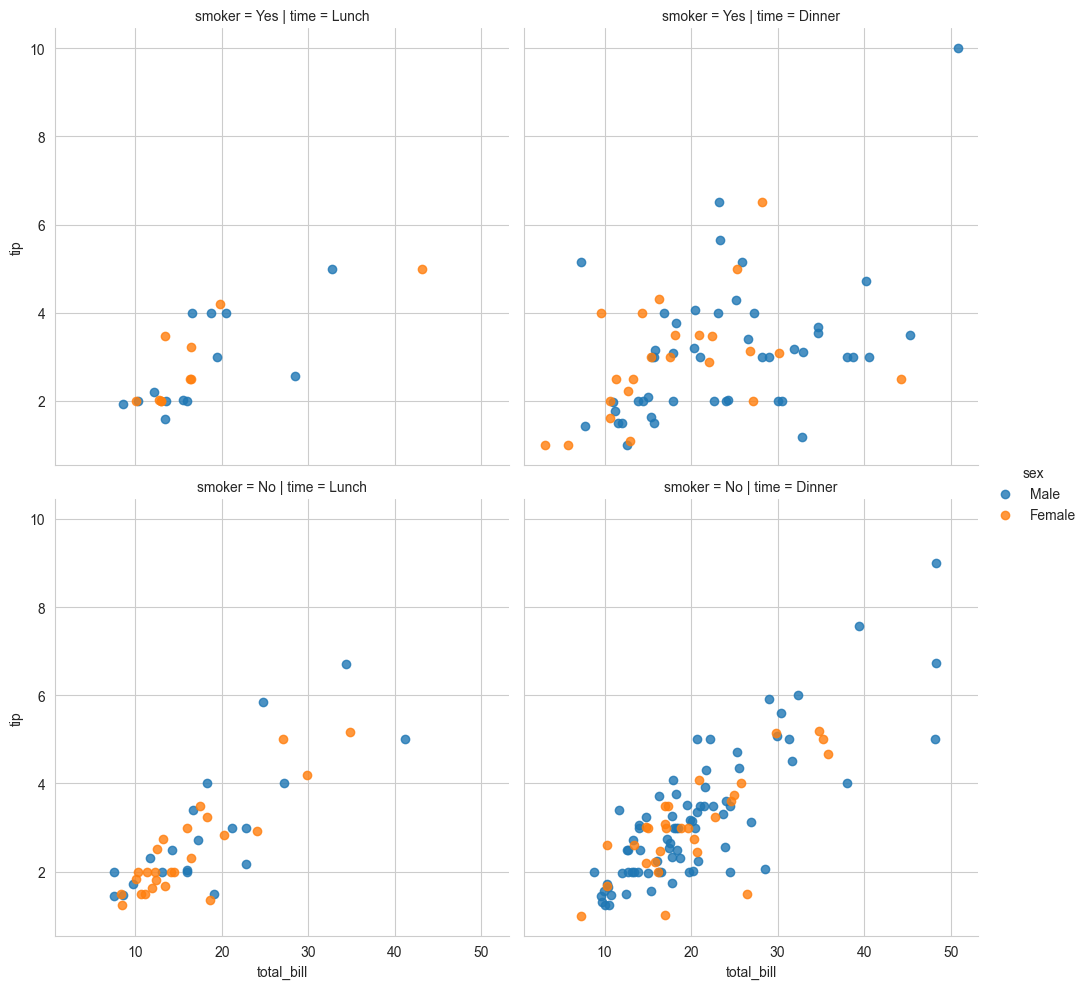

In [154]:
sns.lmplot(data=tips, x="total_bill", y="tip", fit_reg=False, hue="sex", col="time", row="smoker")

* 히스토그램 (Histogram): 단일 변수의 분포를 보여주는데 사용됩니다.

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

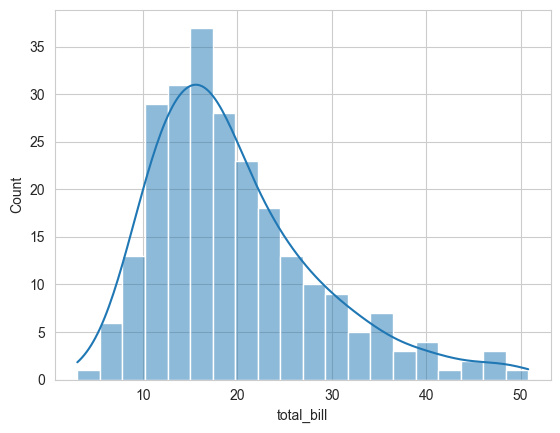

In [129]:
sns.histplot(tips, x="total_bill", bins=20, kde=True)  # 1개 특성: 단변량 그래프(연속 변수)

* 바 플롯 (Bar plot): 범주형 데이터의 분포를 보여줍니다.

<AxesSubplot: xlabel='day', ylabel='count'>

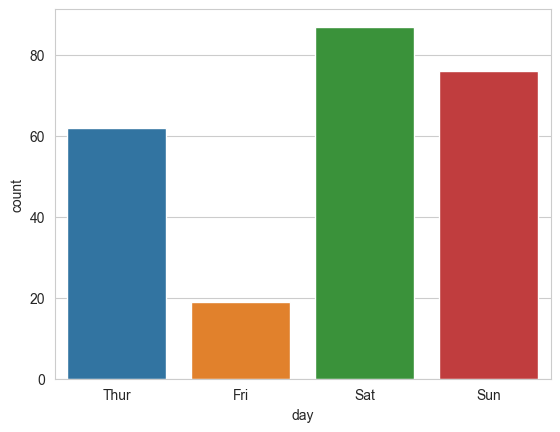

In [132]:
# 빈도 막대 그래프(단변량 그래프: 범주형 데이터)

sns.countplot(tips, x="day")

<AxesSubplot: xlabel='sex', ylabel='tip'>

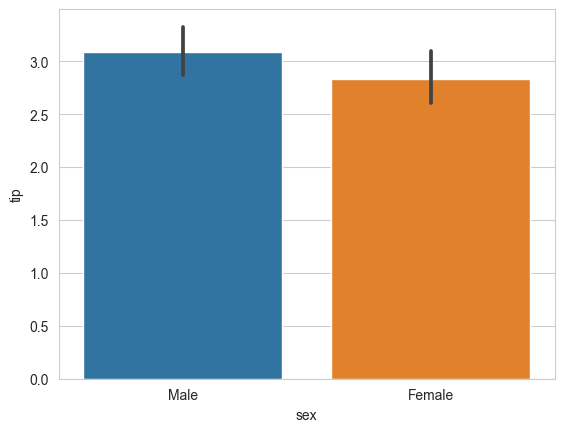

In [138]:
# 평균 막대 그래프(이변량, 범주형변수, 연속변수)

sns.barplot(data=tips, x='sex', y='tip')    # 검은색 선은 신뢰구간, 95%의 확률로 여기서 움직인다

* 박스 플롯 (Box plot): 데이터의 중앙값, IQR, 이상치를 보여줍니다.

<AxesSubplot: xlabel='sex', ylabel='tip'>

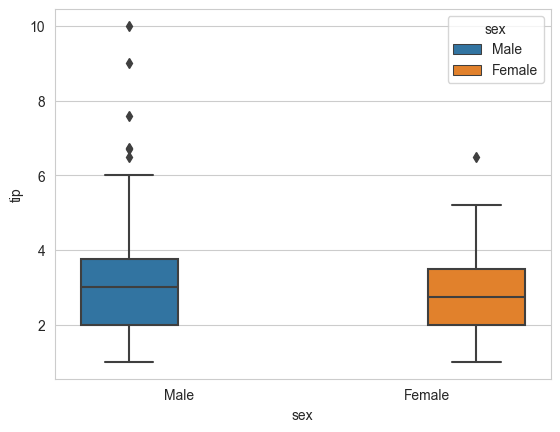

In [155]:
# 머신러닝(이상치 파악 // 평균)

sns.boxplot(tips, x="sex", y="tip", hue="sex")

<AxesSubplot: xlabel='sex', ylabel='tip'>

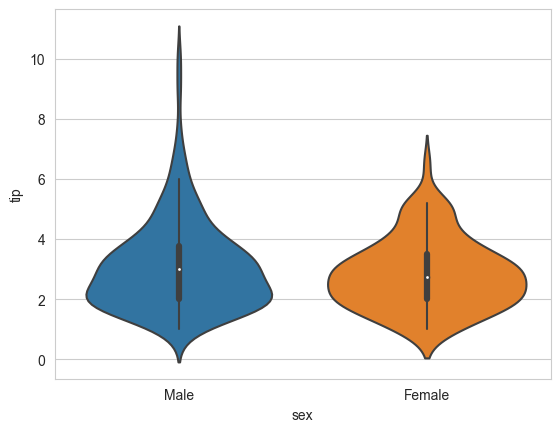

In [147]:
sns.violinplot(tips, x="sex", y="tip")

* 히트맵 (Heatmap): 변수 간 상관 관계 등을 색상을 사용해 시각적으로 표현합니다.

* pairplot: 데이터셋 내의 여러 변수 간의 관계를 한 눈에 보여주는 그래프입니다. 대각선 상에는 각 변수의 히스토그램이나 KDE(커널 밀도 추정)가 표시되고, 그 외의 영역에는 산점도가 표시됩니다.

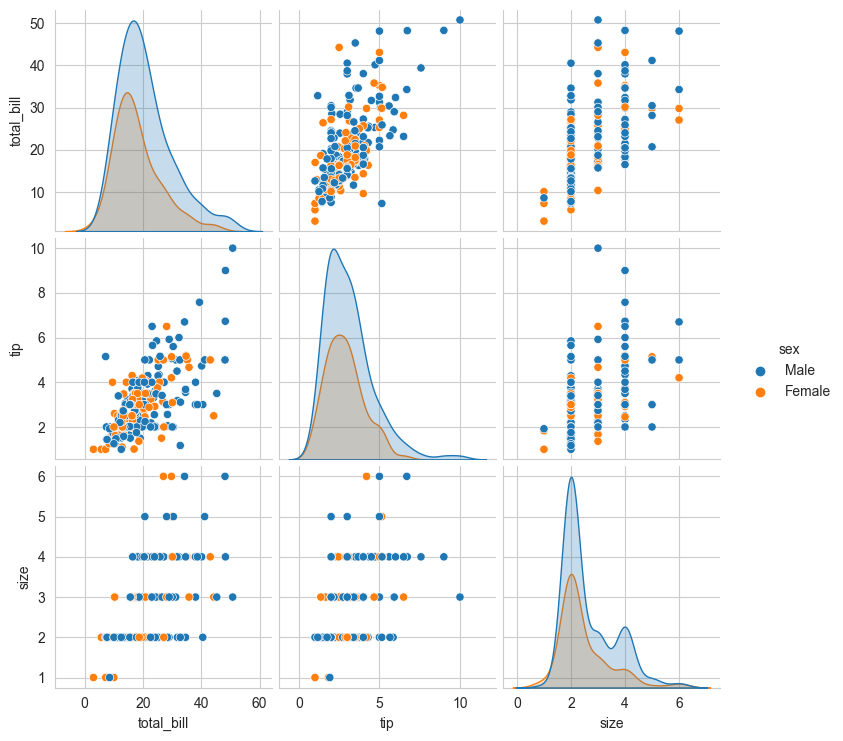

In [156]:
# 산점도 행렬(비교할 수 있는 모든 열끼리 비교해서 산점도)
sns.pairplot(tips, hue="sex")

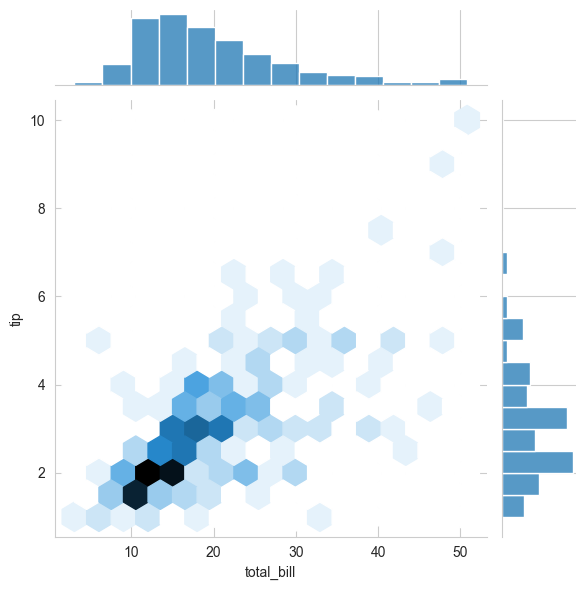

In [145]:
# 히스토그램 + 산점도

sns.jointplot(tips, x="total_bill", y="tip", kind="hex")

* kdeplot: 커널 밀도 추정(Kernel Density Estimation, KDE)을 통해 데이터의 분포를 그리는 함수입니다. 히스토그램과 유사하지만, 부드러운 선을 가지고 있어 분포를 보다 정확하게 나타냅니다.

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

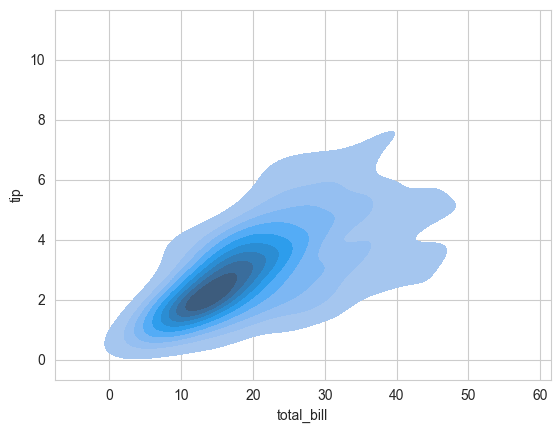

In [146]:
# 단변량, 이변량: 얼마나 밀집되어있냐?
sns.kdeplot(data=tips, x="total_bill", y="tip", fill=True)

* swarmplot: 범주형 변수에 대한 값의 분포를 보여주는 그래프입니다. 이 그래프는 각 범주에 대해 데이터 포인트를 나타내므로 범주별로 값의 분포를 이해하는 데 유용합니다.

<AxesSubplot: xlabel='sex', ylabel='tip'>

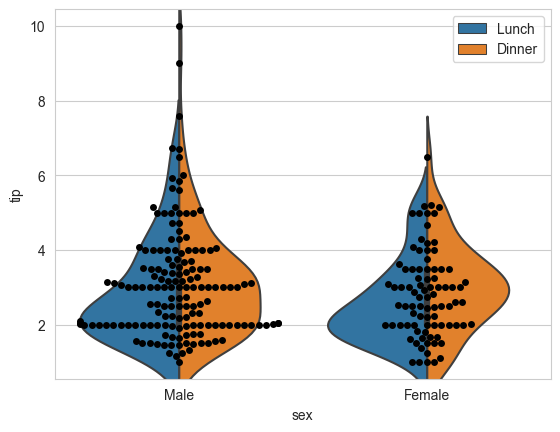

In [163]:
sns.violinplot(tips, x="sex", y="tip", hue="time", split=True)
sns.swarmplot(tips, x="sex", y="tip", color="k")

<AxesSubplot: xlabel='month', ylabel='year'>

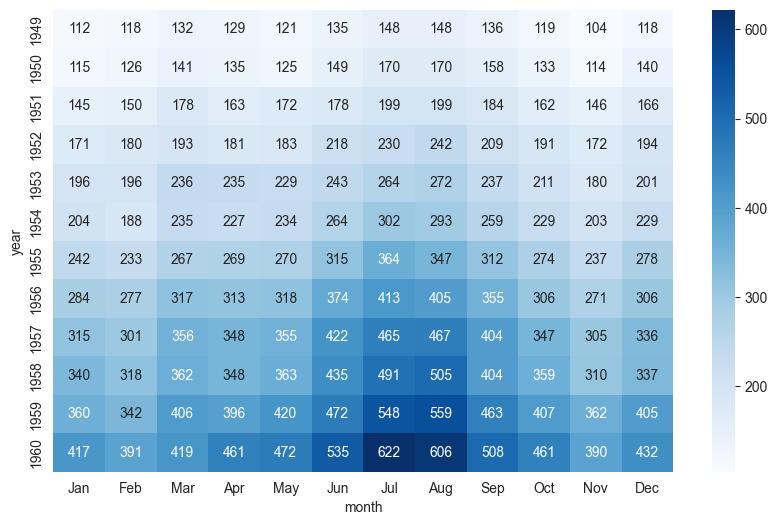

In [180]:
flights = sns.load_dataset("flights")

result = flights.pivot_table(index="year", columns="month", values="passengers", aggfunc="sum")

result

plt.figure(figsize=(10, 6))
sns.heatmap(result, annot=True, fmt=".0f", cmap="Blues")

### Plotly
Plotly는 대화형 그래픽을 만들 수 있는 라이브러리로, Python뿐만 아니라 R, JavaScript 등 다양한 언어에서 사용할 수 있습니다. Plotly는 그래프를 클릭하거나 드래그하여 확대/축소하거나 회전시키는 등의 인터랙티브한 기능을 제공합니다.

* 선 그래프 (Line Plot): 데이터가 시간, 순서 등에 따라 어떻게 변하는지 보여주는데 사용됩니다.

In [185]:
import plotly.graph_objects as go

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

go.Figure(data=go.Scatter(x=x, y=y, mode="lines"))

* 막대 그래프 (Bar Plot): 범주형 데이터를 대표하는데 주로 사용됩니다.

In [186]:
x = ['Category1', 'Category2', 'Category3']
y = [3, 12, 5]

go.Figure(data=go.Bar(x=x, y=y))

* 히스토그램 (Histogram): 데이터의 분포를 보여주는데 사용됩니다.

In [190]:
data = np.random.randn(500)

go.Figure(data=go.Histogram(x=data))

* 산점도 (Scatter Plot): 두 변수 간의 관계를 보여주는데 사용됩니다.

In [187]:

x = np.random.randn(100)
y = np.random.randn(100)

go.Figure(data=go.Scatter(x=x, y=y, mode="markers"))

* 3D 산점도 (3D Scatter Plot): 세 변수 간의 관계를 보여주는데 사용됩니다.

In [195]:
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

go.Figure(data = go.Scatter3d(x=x, y=y, z=z, mode="markers"))

* Box plot은 통계학에서 데이터의 퍼짐을 시각화하는 방법입니다. 데이터의 중앙값, 사분위수, 이상치 등을 한 눈에 파악할 수 있습니다.

In [196]:
y = np.random.randn(50)

go.Figure(data = go.Box(y=y))

### 연습문제
1. Matplotlib을 사용하여 y = x^2 함수를 그래프로 표현하십시오.

In [197]:
import numpy as np

x = np.linspace(-10, 10, 100)
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

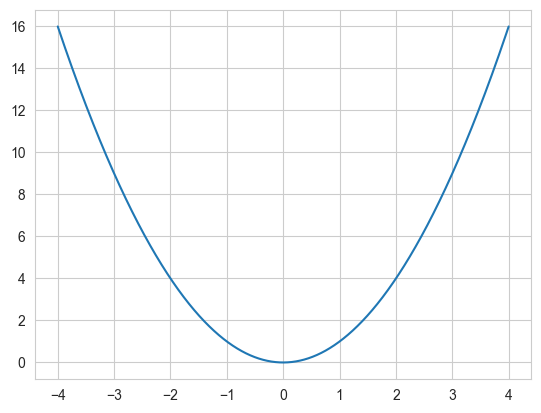

In [201]:
# x = np.arange(-4, 4, 0.1)
x = np.linspace(-4, 4, 10000)
y = x ** 2

plt.plot(x, y)

2. Seaborn의 내장 데이터셋 "iris"를 불러와 pairplot을 그리십시오.

3. Plotly를 사용하여 [1, 2, 3, 4]의 x 좌표와 [10, 15, 7, 10]의 y 좌표를 가지는 선 그래프를 그리십시오.

4. Matplotlib을 사용하여 사인 함수와 코사인 함수를 하나의 그래프에 표시하십시오.
* 힌트: np.sin(x), np.cos(x)

In [79]:
x = np.linspace(-10, 10, 100)

5. Seaborn의 내장 데이터셋 "tips"를 불러와, "total_bill"의 히스토그램과 KDE 그래프를 함께 그리십시오.

6. Plotly를 사용하여 [1, 2, 3, 4]의 x 좌표와 [10, 15, 7, 10]의 y 좌표를 가지는 막대 그래프를 그리십시오.

7. Matplotlib을 사용하여 y = sin(x)와 y = cos(x)를 서브플롯 2개에 나누어 그리십시오.

8. Seaborn의 내장 데이터셋 "tips"를 불러와 요일(day)에 따른 total_bill의 바이올린 플롯을 그리십시오.

9. Plotly를 사용하여 [1, 2, 3, 4]의 x 좌표와 [3, 3.5, 2, 4.5]의 y 좌표, [1, 2, 1, 2]의 z 좌표를 가지는 3D 산점도를 그리십시오.

10. Seaborn의 내장 데이터셋 "titanic"을 불러와, 성별에 따른 생존자 수를 바 플롯으로 표현하십시오.

In [7]:
titanic.survived.sum()

342

In [13]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic_survived = titanic.groupby("sex")["survived"].sum()


sex
female    233
male      109
Name: survived, dtype: int64


TypeError: 'Index' object is not callable

11. 위의 "titanic" 데이터셋에서, 클래스(pclass)별로 생존자와 사망자의 수를 바 플롯으로 나타내십시오.

12. "iris" 데이터셋을 불러와, 종(species)별로 petal_length의 히스토그램을 그리십시오.

13. Seaborn의 "flights" 데이터셋을 불러와, 연도(year)와 승객 수(passengers)에 대한 선 그래프를 그리십시오.
* 힌트: sns.lineplot(x, y)

14.  "flights" 데이터셋을 불러와, 각 월별로 승객 수의 분포를 박스 플롯으로 그리십시오.

15. titanic" 데이터셋을 불러와, 나이(age)와 운임(fare) 사이의 관계를 산점도로 표시하고, 생존 여부(alive)에 따라 색상을 구분하십시오.